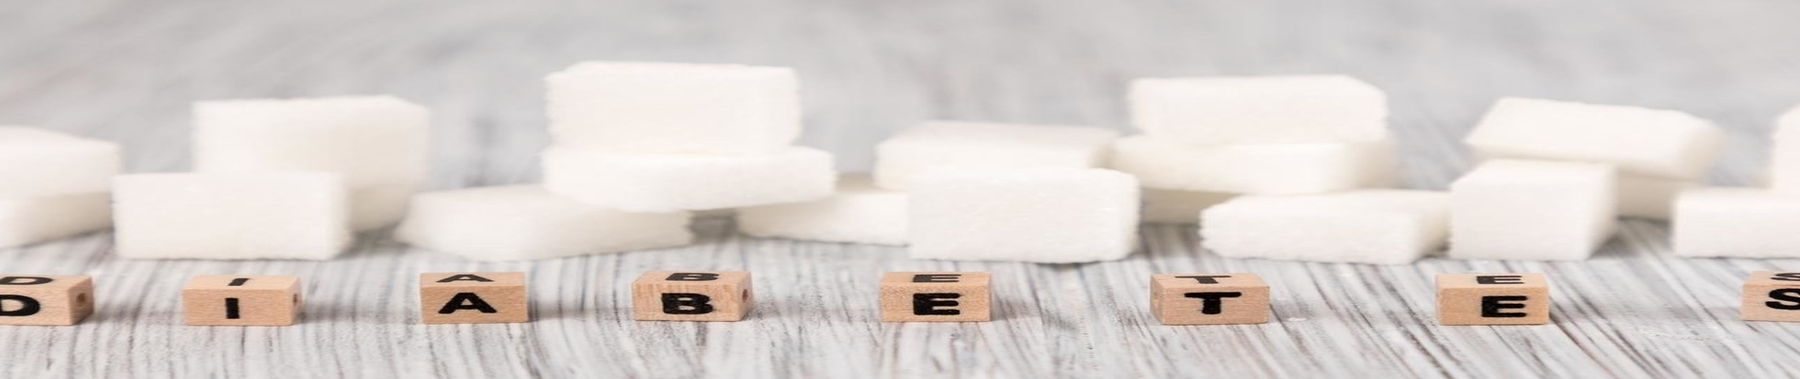

**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

---
**Content**
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
---
Pregnancies: Number of times pregnant

---
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

---
BloodPressure: Diastolic blood pressure (mm Hg)

---
SkinThickness: Triceps skin fold thickness (mm)

---
Insulin: 2-Hour serum insulin (mu U/ml)

---
BMI: Body mass index (weight in kg/(height in m)^2)

---

DiabetesPedigreeFunction: Diabetes pedigree function

---


Age: Age (years)

---


Outcome: Class variable (0 or 1)

---

**Sources:**
---
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
---
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
---
The Johns Hopkins University
--
Johns Hopkins Road
---
Laurel, MD 20707
---
(301) 953-6231
---
(c) Date received: 9 May 1990
---

the link to the dataset:https://www.kaggle.com/datasets/mathchi/diabetes-data-set

# **import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Read Dataset**

In [ ]:
data=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# **EDA**

In [ ]:
# Display concise summary of the DataFrame including:
# - number of rows and columns
# - column names and data types
# - count of non-null values per column
# - memory usage
data.info()

dataset have 9 column and 768 rows.
one target(0 = non-diabetic, 1 = diabetic).
Each column in the data set is a numerical value of integers and decimals.



show first and last 5 rows in dataset.

In [ ]:
# Display the first 5 rows of the DataFrame (default = 5)
data.head()

In [ ]:
# Display the last 5 rows of the DataFrame (default = 5)
data.tail()

## **Describe Dataset**

In [ ]:
# Generate descriptive statistics for numeric columns:
# - count, mean, standard deviation
# - min, 25%, 50%, 75%, and max values
data.describe()

**Feature-wise Statistical Summary**

🔹 **Outcome** (Target Variable)

Binary: 0 (non-diabetic), 1 (diabetic)

Mean: 0.349 → ~34.9% of participants are diabetic

Distribution: Slightly imbalanced (more non-diabetic cases).

🔹 **Pregnancies**

Range: 0 - 17

Mean: 3.85 | Std: 3.37

Median (50%): 3

Most women had 1-6 pregnancies, though a maximum of 17 is recorded (an extreme case).

🔹 **Glucose**

Range: 0 - 199

Mean: 120.9 | Std: 31.97

Median: 117

25% - 75%: 99 - 140

Note: A minimum glucose of 0 is unrealistic, indicating missing values coded as zero.

🔹 **Blood Pressure**

Range: 0 - 122

Mean: 69.1 | Std: 19.36

Median: 72

25% - 75%: 62 - 80

Note: Blood pressure of 0 is also unrealistic → missing/incorrect data.

🔹 **Skin Thickness**

Range: 0 - 99

Mean: 20.5 | Std: 15.95

Median: 23

25% - 75%: 0 - 32

Large portion of the dataset has 0 values, indicating missing measurements.

🔹 **BMI (Body Mass Index)**

Range: 0 - 67.1

Mean: 31.99 | Std: 7.88

Median: 32

25% - 75%: 27.3 - 36.6

Note: BMI = 0 is biologically impossible, indicating missing data.

🔹 **Diabetes Pedigree Function (DPF)**

Range: 0.078 - 2.42

Mean: 0.47 | Std: 0.33

Median: 0.37

A measure of genetic risk; distribution shows most values below 1.

🔹 **Age**

Range: 21 - 81

Mean: 33.24 | Std: 11.76

Median: 29

25% - 75%: 24 - 41

Most participants are young to middle-aged adults.



## **univariate Analysis**

### **Target(outcome)**

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 4))

# ================= Bar Plot =================
# Count the number of occurrences of each Outcome value
outcome_counts = data['Outcome'].value_counts()

# Create a bar chart for Outcome distribution
axes[0].bar(outcome_counts.index, outcome_counts.values)
axes[0].set_title('Outcome Distribution')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Count')

# ================= Pie Chart =================
# Create a pie chart for Outcome percentages
axes[1].pie(outcome_counts.values,
            labels=outcome_counts.index,
            autopct='%1.1f%%')
axes[1].set_title('Outcome Percentage')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

**Outcome (Target Variable) - Bar Chart**

A bar chart showing the count of each outcome.

There is a significant class imbalance.

---

**Outcome (Target Variable) - pie Chart**

Non-Diabetic (0): 65.1% of the samples (~500 individuals)

Diabetic (1): 34.9% of the samples (~200 individuals)

Implication: Any predictive model trained on this data must account for this imbalance to avoid bias towards predicting the majority class (non-diabetic).

### **Age**

In [ ]:
# Create a figure with 1 row and 2 columns of subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# ================= Histogram =================
# Plot histogram to visualize the distribution of ages
sns.histplot(y=data['Age'], bins=20, ax=axes[0])  # y=Age for horizontal bars
axes[0].set_title('Age Distribution')

# ================= Boxplot =================
# Plot boxplot to show spread, median, and potential outliers in Age
sns.boxplot(y=data['Age'], ax=axes[1])
axes[1].set_title('Age Boxplot')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Figure 1 (left) - Age Distribution (Histogram)**

The most common age group is between 21 and 30, where the highest number of individuals appear.

There is a gradual decrease in frequency with increasing age.

People over 60 are present, but in very small numbers.

---


**For the second figure (right) - Age Boxplot**

Median: approximately 29 years (line inside the box).

Interquartile range (IQR): Q1 ≈ 24 years and Q3 ≈ 41 years.
→ This means that approximately half of the sample is between the ages of 24 and 41.

Outliers: visible on the right of the figure (people aged 60-80).

Data spread: Most of the ages are concentrated in the young, while older people are rare.

### **Diabetes Pedigree Function (DPF)**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Histogram ================
# Plot histogram to show the distribution of Diabetes Pedigree Function values
sns.histplot(y=data['DiabetesPedigreeFunction'], ax=axes[0])
axes[0].set_title('Diabetes Pedigree Function Distribution')
axes[0].set_ylabel('Diabetes Pedigree Function')

# ================ Boxplot ================
# Plot boxplot to visualize spread, median, and outliers of Diabetes Pedigree Function
sns.boxplot(y=data['DiabetesPedigreeFunction'], ax=axes[1])
axes[1].set_title('Diabetes Pedigree Function Boxplot')

# Adjust spacing to prevent overlap
plt.tight_layout()
plt.show()

**The first chart (left) - Histogram (Diabetes Pedigree Function)**

The graph shows that most values range between 0.1 and 1.0.

The gradient decreases as the DPF value increases.

Values above 1.5 to 2.5 are very low.

---

**The second figure (right) - Boxplot (Diabetes Pedigree Function)**

shows the full distribution of the variable.

Median: approximately 0.37.

Most of the data is within the range [0.2 – 0.6].

There are many outliers above 1.0 and extending up to 2.5.

This confirms that the distribution is right-skewed.

### **BMI**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# ================ Histogram ================
# Plot histogram to show BMI distribution
sns.histplot(y=data['BMI'], ax=axes[0])
axes[0].set_title('BMI Distribution')
axes[0].set_ylabel('BMI')
axes[0].set_xlabel('Count')

# ================ Boxplot ================
# Plot boxplot to visualize spread, median, and outliers of BMI
sns.boxplot(y=data['BMI'], ax=axes[1])
axes[1].set_title('BMI Boxplot')

# Adjust spacing
plt.tight_layout()
plt.show()


**BMI (Body Mass Index) - Boxplot & Distribution**

A combined boxplot and histogram showing the distribution of BMI values.

The data is roughly normally distributed but slightly right-skewed (a longer tail on the right/higher values).

The median BMI (line in the box) appears to be around 32.

The interquartile range (IQR, the box) is approximately from 27 to 36.

There are numerous extreme outliers with very high BMI values (above 50, even up to 70). These could be legitimate severe cases or potential data entry errors (e.g., missing values coded as 0, which is common in this dataset).

### **Skin Thickness**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# ================ Histogram ================
# Plot histogram to show distribution of Skin Thickness
sns.histplot(x=data['SkinThickness'], ax=axes[0])   # use x for vertical orientation
axes[0].set_title('Skin Thickness Distribution')
axes[0].set_xlabel('Skin Thickness')
axes[0].set_ylabel('Count')

# ================ Boxplot ================
# Plot boxplot to show spread, median, and outliers of Skin Thickness
sns.boxplot(x=data['SkinThickness'], ax=axes[1])
axes[1].set_title('Skin Thickness Boxplot')
axes[1].set_xlabel('Skin Thickness')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Skin Thickness (Triceps Skinfold Thickness) - Boxplot**

This plot shows the most extreme example of a common issue in this dataset. The boxplot is pushed to the very bottom, indicating that a massive number of values are recorded as 0. Like blood pressure, a value of 0 is not plausible and represents missing data. This feature will require significant data cleaning.

### **Blood Pressure**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# ================ Histogram ================
# Plot histogram to show the distribution of Blood Pressure values
sns.histplot(x=data['BloodPressure'], ax=axes[0])   # use x for vertical orientation
axes[0].set_title('Blood Pressure Distribution')
axes[0].set_xlabel('Blood Pressure')
axes[0].set_ylabel('Count')

# ================ Boxplot ================
# Plot boxplot to visualize spread, median, and outliers of Blood Pressure
sns.boxplot(x=data['BloodPressure'], ax=axes[1])
axes[1].set_title('Blood Pressure Boxplot')
axes[1].set_xlabel('Blood Pressure')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Blood Pressure - Boxplot & Distribution**

The distribution is also roughly normal.

The median blood pressure is around 70 mmHg.

The IQR is approximately from 62 to 80 mmHg.

There is a concerning number of values at or near 0, which is physiologically impossible for a living person. These are almost certainly missing values that have been incorrectly coded as 0 and will need to be handled (e.g., imputed or removed).

### **Glucose**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# ================ Histogram ================
# Plot histogram to show the distribution of Glucose values
sns.histplot(x=data['Glucose'], ax=axes[0])   # use x for vertical orientation
axes[0].set_title('Glucose Distribution')
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Count')

# ================ Boxplot ================
# Plot boxplot to visualize spread, median, and outliers of Glucose
sns.boxplot(x=data['Glucose'], ax=axes[1])
axes[1].set_title('Glucose Boxplot')
axes[1].set_xlabel('Glucose')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Glucose - Boxplot & Distribution**

The median glucose level is around 117 mg/dL.

Critically, there are values at 0. Plasma glucose cannot be zero; this indicates missing data that has been incorrectly coded.

### **Pregnancies**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# ================ Histogram ================
# Plot histogram to show the distribution of number of pregnancies
sns.histplot(x=data['Pregnancies'], ax=axes[0])   # vertical orientation
axes[0].set_title('Pregnancies Distribution')
axes[0].set_xlabel('Pregnancies')
axes[0].set_ylabel('Count')

# ================ Boxplot ================
# Plot boxplot to visualize spread, median, and outliers of pregnancies
sns.boxplot(x=data['Pregnancies'], ax=axes[1])
axes[1].set_title('Pregnancies Boxplot')
axes[1].set_xlabel('Pregnancies')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Pregnancies - Histogram & Boxplot**

The data is heavily right-skewed. Most women have a low number of pregnancies (0-5), while a few have many (up to 17).

The median is around 3 pregnancies.

The boxplot confirms the skew, with the median positioned closer to the bottom of the box and a long "whisker" extending towards the higher values. There are no impossible values here, just a natural, expected distribution.

## **Multivariate**

### **Outcome & Age relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Age vs Outcome
# Outcome on x-axis (categorical), Age on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['Age'], ax=axes[0])
axes[0].set_title('Age vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Age')

# ================ Boxplot ================
# Boxplot of Age grouped by Outcome to show distribution
sns.boxplot(x=data['Outcome'], y=data['Age'], ax=axes[1])
axes[1].set_title('Age vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Age')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Age vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the differences between the two groups.

---

**Boxplot (right):**

People without diabetes (Outcome = 0) are mostly concentrated around 27-35 years of age.

People with diabetes (Outcome = 1) are relatively older, with the average being around 34-40 years of age.

There are outliers (extreme values) at older ages.

---

✅ Conclusion: Age has a clear influence, with older people being more susceptible to diabetes.

### **Outcome & Diabetes Pedigree Function(DPF) relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Diabetes Pedigree Function vs Outcome
# Outcome on x-axis (categorical), DPF on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['DiabetesPedigreeFunction'], ax=axes[0])
axes[0].set_title('Diabetes Pedigree Function vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Diabetes Pedigree Function')

# ================ Boxplot ================
# Boxplot of Diabetes Pedigree Function grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['DiabetesPedigreeFunction'], ax=axes[1])
axes[1].set_title('Diabetes Pedigree Function vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Diabetes Pedigree Function')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Diabetes Pedigree Function vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

The values ​​at Outcome = 1 are slightly higher, meaning that people with diabetes have higher genetic values.

However, the distribution is highly overlapping (meaning there isn't a strong difference).

---

✅ Conclusion: Genetics has an effect, but it's less pronounced than age and BMI.

### **Outcome & BMI relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of BMI vs Outcome
# Outcome on x-axis (categorical), BMI on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['BMI'], ax=axes[0])
axes[0].set_title('BMI vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('BMI')

# ================ Boxplot ================
# Boxplot of BMI grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['BMI'], ax=axes[1])
axes[1].set_title('BMI vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('BMI')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**BMI vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

People without diabetes (Outcome = 0) have a lower average BMI (around 28–30).

People with diabetes (Outcome = 1) have a higher average BMI (around 32–34).

It is clear that the prevalence of high BMI is higher among people with diabetes.

---

✅ Conclusion: BMI is a very important and influential factor, and a high BMI is strongly associated with the presence of diabetes.

### **Outcome & Skin Thickness relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Skin Thickness vs Outcome
# Outcome on x-axis (categorical), SkinThickness on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['SkinThickness'], ax=axes[0])
axes[0].set_title('Skin Thickness vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Skin Thickness')

# ================ Boxplot ================
# Boxplot of SkinThickness grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['SkinThickness'], ax=axes[1])
axes[1].set_title('Skin Thickness vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Skin Thickness')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**SkinThickness vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

The values at score = 1 are slightly higher, meaning that diabetics have higher SkinThickness values.

However, the distribution is highly overlapping (i.e., there is no significant difference).

---
✅ Conclusion: SkinThickness has an effect but is less pronounced than age and BMI.

### **Outcome & Blood Pressure relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Blood Pressure vs Outcome
# Outcome on x-axis (categorical), BloodPressure on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['BloodPressure'], ax=axes[0])
axes[0].set_title('Blood Pressure vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Blood Pressure')

# ================ Boxplot ================
# Boxplot of BloodPressure grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['BloodPressure'], ax=axes[1])
axes[1].set_title('Blood Pressure vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Blood Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Blood Pressure vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

People without diabetes (Outcome = 0) have a lower mean blood pressure (approximately 61-79).

People with diabetes (Outcome = 1) have a higher mean BMI (approximately 67-81).

Since there is a small percentage of outliers for both 1 and 2

It is clear that the prevalence of high blood pressure is higher among people with diabetes.

---

✅ Conclusion: Blood pressure is a very important and influential factor, and increased blood pressure is strongly associated with the presence of diabetes.

### **Outcome & Glucose relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Glucose vs Outcome
# Outcome on x-axis (categorical), Glucose on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['Glucose'], ax=axes[0])
axes[0].set_title('Glucose vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Glucose')

# ================ Boxplot ================
# Boxplot of Glucose grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['Glucose'], ax=axes[1])
axes[1].set_title('Glucose vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Glucose')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Glucose vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

People without diabetes (Outcome = 0) have a mean glucose range (approximately 99-125).

People with diabetes (Outcome = 1) have a higher mean glucose range (approximately 125-174).

There is a large percentage of outliers (0).

It is clear that the prevalence of glucose in diabetics is higher, with the higher the level, the greater the risk of developing diabetes.

---

✅ Conclusion: Glucose is a very important and influential factor, and high glucose is strongly associated with the presence of diabetes.

### **Outcome & Pregnanices relationship**

In [ ]:
# Create a figure with 1 row and 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# ================ Scatter Plot ================
# Scatter plot of Pregnancies vs Outcome
# Outcome on x-axis (categorical), Pregnancies on y-axis (numeric)
sns.scatterplot(x=data['Outcome'], y=data['Pregnancies'], ax=axes[0])
axes[0].set_title('Pregnancies vs Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Pregnancies')

# ================ Boxplot ================
# Boxplot of Pregnancies grouped by Outcome
sns.boxplot(x=data['Outcome'], y=data['Pregnancies'], ax=axes[1])
axes[1].set_title('Pregnancies vs Outcome Boxplot')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Pregnancies')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Pregnancies vs. Outcome**

---

**Scatter Plot (left):**

All points are arranged on two lines (Outcome = 0 and Outcome = 1), which doesn't reveal much about the difference between the two groups.

---

**Boxplot (right):**

People without diabetes (Outcome = 0) have average pregnancies (approximately 1.5-5.0).

People with diabetes (Outcome = 1) have higher average pregnancies (approximately 2-8).

There is a small percentage of outliers (0).

It is clear that the prevalence of pregnancies is higher among diabetics, as the higher the prevalence, the greater the risk of developing diabetes.

---

✅ Conclusion: Pregnancy is a very important and influential factor, and increased pregnancies are strongly associated with the presence of diabetes.

### **HeatMap For correlations**

In [ ]:
# Plot a heatmap to visualize correlations between numeric features
# annot=True adds the correlation values on the heatmap
# cmap='Blues' sets the color theme
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# **Data preprocessing**

## **checking missing value**

In [ ]:
# Check for missing values in each column
# Returns the number of null (NaN) values per column
data.isnull().sum()

no misssing value in data

## **checking duplicates**



In [ ]:
# Check for duplicate rows in the DataFrame
# Returns the total number of duplicate rows
data.duplicated().sum()

no  duplicate in data

## **checking 0 value in BMI and in Skin Thickness and Blood Pressure and Glucose**





In [ ]:
# Check how many rows have BMI equal to 0
# Returns the shape (number of rows and columns) of such rows
data[data['BMI'] == 0].shape

We have 11 zero values in the BMI which may be an input error so we process them by encoding them in NAN to deal with them.

In [ ]:
# Check how many rows have SkinThickness equal to 0
# Returns the shape (number of rows and columns) of such rows
data[data['SkinThickness'] == 0].shape

We have 227 zero values in the Skin Theickness which may be an input error so we process them by encoding them in NAN to deal with them.

In [ ]:
# Check how many rows have BloodPressure equal to 0
# Returns the shape (number of rows and columns) of such rows
data[data['BloodPressure'] == 0].shape

We have 35 zero values in the Blood Pressure which may be an input error so we process them by encoding them in NAN to deal with them.

In [ ]:
# Check how many rows have Glucose equal to 0
# Returns the shape (number of rows and columns) of such rows
data[data['Glucose'] == 0].shape

We have 5 zero values in the Glucose which may be an input error so we process them by encoding them in NAN to deal with them.

In [ ]:
# Replace zero values with NaN for columns where 0 is invalid
# This helps mark them as missing values for proper imputation later
data['BMI'].replace(0, np.nan, inplace=True)
data['SkinThickness'].replace(0, np.nan, inplace=True)
data['BloodPressure'].replace(0, np.nan, inplace=True)
data['Glucose'].replace(0, np.nan, inplace=True)

In [ ]:
# Check the number of missing values (NaNs) in each column
# This will show how many zero values were replaced with NaN
data.isnull().sum()

In [ ]:
# Display the first 8 rows of the DataFrame
# Useful for quickly checking the dataset after cleaning or transformations
data.head(8)

filling missing values in data

In [ ]:
# Fill missing values (NaNs) with the median of each column
# This ensures that columns with missing data are replaced with a reasonable central value
data.fillna(data.median(), inplace=True)

In [ ]:
data.isnull().sum()

checking age value

In [ ]:
# Display all unique values in the 'Age' column
# Useful to understand the range and distinct age values in the dataset
data['Age'].unique()

## **Dataset balancing by Smoth technique**

In [ ]:
# Assume data is your data, and 'Outcome' is the target column.
df_majority = data[data.Outcome==0]
df_minority = data[data.Outcome==1]

# Increase minority samples
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sampling with replacement
                                 n_samples=len(df_majority), # To balance the number
                                 random_state=42)

# Data merging
df_balanced = pd.concat([df_majority, df_minority_upsampled])

#Separate features and purpose
X = df_balanced.drop('Outcome', axis=1)
y = df_balanced['Outcome']

In [ ]:
# Display the shape of the resampled feature set after resample
# Returns (number of rows, number of columns)
X.shape

In [ ]:
# Display the count of each class in the resampled target set
# Useful to verify that SMOTE has balanced the classes
y.value_counts()

# **spliting dataset 70% tranning 30% testing**

In [ ]:
# Split the resampled dataset into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Build models**

In [ ]:
# Create a dictionary of machine learning models to compare
dict_models = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(n_neighbors=3),                # K-Nearest Neighbors with k=3
    'Decision Tree': DecisionTreeClassifier(random_state=10),
    'Random Forest': RandomForestClassifier(n_estimators=60, random_state=0),
    'SVM': SVC(kernel="linear"),                                # Support Vector Machine with linear kernel
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    'Naive Bayes': GaussianNB()
}

# Display the dictionary of models
dict_models


# **Training models**

In [ ]:
# Lists to store model performance metrics
list_models_name = []       # Names of models
list_models_accuracy = []   # Accuracy on test set
list_models_f1 = []         # F1-score on test set

# Iterate through each model in the dictionary
for name, model in dict_models.items():
    list_models_name.append(name)

    # Train the model on the training set
    model.fit(x_train, y_train)

    # Predict on the test set
    predict = model.predict(x_test)

    # Calculate accuracy and F1-score
    acc = accuracy_score(y_test, predict)
    f1 = f1_score(y_test, predict)

    # Store metrics in lists (multiply by 100 to show as percentage)
    list_models_accuracy.append(acc * 100)
    list_models_f1.append(f1 * 100)

    # Predict on training set to check for overfitting
    predict_train = model.predict(x_train)

    # Print metrics
    print(f"{name}: Test Accuracy = {acc * 100:.2f}%")
    print(f"{name}: Train Accuracy = {accuracy_score(y_train, predict_train) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, predict))
